# Bang For Your Buck: MLB Edition

## By : Rated R^2 (Matthew Phillips, Jacob Laundroche, Esther Shin, Gerrad , Jackson )

### Research Question: 
Are position players on higher salaries actually performing better as hitters? If so, which batting statistics are most telling in how much a player is getting paid?

### Background Information

   ####    For this project, our group, Rated R^2, analyzed Sean Lahman's baseball datasets in order to deeper evaluate the game of baseball. After battling with deciding where to take our research, we decided to focus on one of the hottest topics in Major League Baseball right now, money. This offseason some players, like Bryce Harper, Mike Trout, and Manny Machado, signed contracts for 300+ million dollars. With that in mind,  we wanted to see if some players are really as valuable as they seem. For this reason, our data focuses on the attributes of every player from the 2007-2016 seasons in order for us to evaluate their salaries. Because baseball data is recorded at every baseball game, we are able to look at players from all 30 teams from both the American League and National League Divisions that comprise Major Leage Baseball over each regular season, 162 games, in order to draw conclusions about which players are worth the money.
   ####   Baseball is a game played between 2 teams with 9 players on each team. Each player plays a different position on the field, Pitcher, Catcher, Third Base, Shortstop, Second Base, First Base, Right Field, Center Field, and Left Field. While one team plays the field, the opposing team is on offense or hitting/batting. There are 9 innings in a Major League Baseball game with each team receiving an opportunity to bat in each inning. Each player or batter on the offensive team has an opportunity to reach base where they recieve pitches from the pitcher and attempt to hit the ball or get on base a different way. It is importnat to note here that pitchers typically are poor hitters, and in the American League, someone is allowed to hit for them in the game (this is called a DH or designated hitter). A batter receives pitches from the pitcher that either lead to a strikeout, walk, hit, out, error, sacrifice, or hit-by-pitch. A strikeout is recorded if the pitcher successfully throws the batter three strikes without the batter hitting the third strike. A walk is recorded if the pitcher throws 4 balls in which the batter is allowed to go to first base. A hit is recorded if the batter makes contact with ball in the field of play and the defensive team is unable to field the ball. An out is recorded if the batter hits a ball and the defense successfully field the ball causing the player to be out. With three outs, the teams switch from offense to defense (this occurs 18 times in a Major League Baseball game). An error is recorded if the defensive team has a chance to field the ball after the batter has hit the ball, yet they poorly execute the play and the hitter still reaches base. A sacrifice is when a batter hits a ball which results in an out, yet a runner on a base advances to the next base. A hit-by-pitch is recorded if a pitcher hits a batter with his pitch; this allows the batter to take first base. When a batter gets on base, he now becomes a runner and tries to touch all four bases before his/her team receives three outs. If at anytime, a batter helps a runner on base score a run, the batter receives an RBI, run-batted-in. Everytime a batter receives an out, error, hit, or strikeout a batter receives an At Bat (‘AB’ in this dataset); walks, sacrifices, and hit-by-pitch do not count for an ‘AB’ for a batter. With this basis of understanding, we trimmed down our data to incorporate these hitting statistics to help look at salary for players. 
   ####    In order to get more specific hitting stats, we broke hits down into doubles, triples and homeruns. A double is anytime a player gets a hit and is able to reach second base before the defense can successfully field the ball with no errors. Similarly, a triple is anytime a batter gets to third base without the fielders being able to make a play with no errors on the ball. Finally, a homerun is when a player either hits the ball out of the park, or is able to touch all four bases before the fielders are able to make a play on the ball with no errors.
   ####    Using these hitting statistics for a batter, we created new variables that would better suit our analysis. In order to see how many hits a player averages per at bat, we divided the hits variable by the ‘AB’ variable to get batting average or ‘BA’ in our data. Next, we created ‘BBAB’ which is base-on-balls or walks per ‘AB’. Then, we created ‘TRAB’,  triples per ‘AB’, ‘DOAB’, doubles per ‘AB’, ‘RBIAB, RBIs per ‘AB’, ‘HRAB’, homeruns per ‘AB’, and  ‘SOAB’, strikeouts per ‘AB’. 
   ####    This dataset we created by merging several of Lahman’s baseball datasets includes the above variables along with ‘salary’ and ‘G_all’ and ‘playerID’ which were also very important in our analysis. The ‘salary’ variable is how much money each player represented by their ‘playerID’ made each year from 2007-2016. We used this variable to create a new variable called ‘quartile’ where we broke up the salaries of players into 4 groups (lowest salary to highest salary quartiles) that we found useful for further analysis on statistics.  The ‘G_all’ variable shows how many times a player appeared in a game in a year. 
   ####    From all of this data, we were able to create a way to evaluate hitting attributes and how they tell a story about salaries in baseball.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [2]:
batting = pd.read_csv("Downloads/Stats 131/baseballdatabank-2019.2/core/batting.csv")
salaries = pd.read_csv("Downloads/Stats 131/baseballdatabank-2019.2/core/Salaries.csv")
appear = pd.read_csv("Downloads/Stats 131/baseballdatabank-2019.2/core/Appearances.csv")
fielding = pd.read_csv("Downloads/Stats 131/baseballdatabank-2019.2/core/Fielding.csv")

In [3]:
#baseball = batting.merge(right = fielding, on=["yearID", "playerID", "teamID", "lgID"])
#baseball.head()

In [4]:
baseball = batting.merge(right = appear, on=["yearID", "playerID", "teamID", "lgID"])
baseball.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0,0,1,0,0,0,0,0.0,0.0,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,22,0,3,0,0,0,0,0.0,0.0,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,2,0,0,0,29,0,29,0.0,0.0,0.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,2,20,0,1,0,0,1,0.0,0.0,0.0


In [5]:
baseball = baseball.merge(right = salaries, on=["yearID", "playerID", "teamID", "lgID"])
baseball.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,salary
0,ackerji01,1985,1,TOR,AL,61,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,170000
1,agostju01,1985,1,CHA,AL,54,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,147500
2,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,...,7,60,0,0,0,0,0.0,11.0,9.0,237000
3,alexado01,1985,1,TOR,AL,36,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,875000
4,allenne01,1985,1,SLN,NL,23,2,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,750000


In [6]:
baseball = baseball.loc[baseball.yearID > 2006]
baseball.head()


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,salary
17394,aardsda01,2007,1,CHA,AL,25,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,387500
17395,abreubo01,2007,1,NYA,AL,158,605,123,171,40,...,0,0,0,0,157,157,1.0,4.0,1.0,15000000
17396,accarje01,2007,1,TOR,AL,64,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,392200
17397,affelje01,2007,1,COL,NL,75,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,1250000
17398,alfonan01,2007,1,PHI,NL,61,1,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,380000


In [7]:
#baseball = baseball.loc[baseball.POS !=  "P"]
#baseball.shape

In [8]:
baseball['G_all'].quantile([0,.25,0.36,.5,0.6,.75,1])

0.00      1.0
0.25     30.0
0.36     36.0
0.50     60.0
0.60     72.0
0.75    108.0
1.00    163.0
Name: G_all, dtype: float64

In [9]:
baseball = baseball.loc[baseball.G_all >= 102]
baseball.shape

(2214, 40)

In [10]:
baseball['salary'].quantile([.25,.5,.75,1])
Q1 = baseball['salary'].quantile([.25,.5,.75,1])[0.25]
Q2 = baseball['salary'].quantile([.25,.5,.75,1])[0.5]
Q3 = baseball['salary'].quantile([.25,.5,.75,1])[0.75]
Q4 = baseball['salary'].quantile([.25,.5,.75,1])[1]



In [11]:
baseball["BA"] = baseball.H/baseball.AB
baseball["HRAB"] = baseball.HR/baseball.AB
baseball["TRAB"] = baseball["3B"]/baseball.AB
baseball["DOAB"] = baseball["2B"]/baseball.AB
baseball["RBIAB"] = baseball.RBI/baseball.AB
baseball["BBAB"] = baseball.BB/baseball.AB
baseball["SOAB"] = baseball.SO/baseball.AB
baseball = baseball.reset_index(drop=True)
quart = []
for i in range(0,len(baseball.salary)):
    if baseball.salary[i] <= Q1:
        quart.append(1)
    elif baseball.salary[i] <= Q2:
        quart.append(2)
    elif baseball.salary[i] <= Q3:
        quart.append(3)
    else:
        quart.append(4)
baseball["quartile"] = quart
baseball123 = baseball.loc[baseball.quartile <4]
baseball12 = baseball.loc[baseball.quartile <3]
baseball.head()


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,G_pr,salary,BA,HRAB,TRAB,DOAB,RBIAB,BBAB,SOAB,quartile
0,abreubo01,2007,1,NYA,AL,158,605,123,171,40,...,1.0,15000000,0.282645,0.026446,0.008264,0.066116,0.166942,0.138843,0.190083,4
1,amezaal01,2007,1,FLO,NL,133,400,46,105,14,...,6.0,380000,0.262500,0.005000,0.022500,0.035000,0.075000,0.087500,0.130000,1
2,anderga01,2007,1,LAA,AL,108,417,67,124,31,...,0.0,11600000,0.297362,0.038369,0.002398,0.074341,0.191847,0.064748,0.129496,4
3,atkinga01,2007,1,COL,NL,157,605,83,182,35,...,0.0,400000,0.300826,0.041322,0.001653,0.057851,0.183471,0.110744,0.158678,1
4,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,...,1.0,4000000,0.234957,0.008596,0.008596,0.045845,0.071633,0.106017,0.212034,3


In [12]:
baseball_1st = baseball.loc[baseball.salary <= Q1]
baseball_2nd = baseball.loc[baseball.salary <= Q2].loc[baseball.salary > Q1]
baseball_3rd = baseball.loc[baseball.salary <= Q3].loc[baseball.salary > Q2]
baseball_4th = baseball.loc[baseball.salary > Q3 ]
print(baseball_4th.shape)
print(baseball_3rd.shape)
print(baseball_2nd.shape)
print(baseball_1st.shape)

(554, 48)
(550, 48)
(554, 48)
(556, 48)


In [13]:
baseball.shape

(2214, 48)

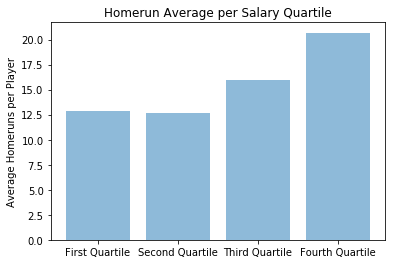

In [14]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.HR.mean(),baseball_2nd.HR.mean(),baseball_3rd.HR.mean(),baseball_4th.HR.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Homeruns per Player')
plt.title('Homerun Average per Salary Quartile')

plt.show()


In [15]:
d= {'Homerun Average per Player' : [baseball_1st.HR.mean(),baseball_2nd.HR.mean(),baseball_3rd.HR.mean(),baseball_4th.HR.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Homerun Average per Player'])
df2  

,Quartile,Homerun Average per Player
0,1,12.899281
1,2,12.703971
2,3,15.938182
3,4,20.684116


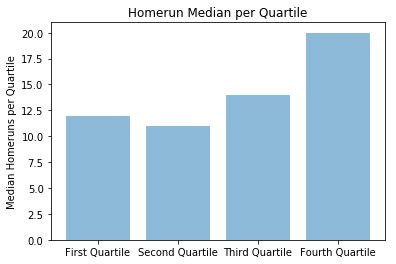

In [16]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.HR.median (),baseball_2nd.HR.median(),baseball_3rd.HR.median(),baseball_4th.HR.median()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Median Homeruns per Quartile')
plt.title('Homerun Median per Quartile')

plt.show()

In [17]:
d= {'Homerun Median per Player' : [baseball_1st.HR.median(),baseball_2nd.HR.median(),baseball_3rd.HR.median(),baseball_4th.HR.median()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Homerun Median per Player'])
df2  

,Quartile,Homerun Median per Player
0,1,12.0
1,2,11.0
2,3,14.0
3,4,20.0


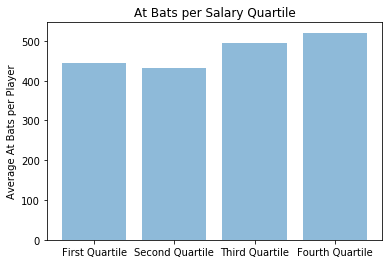

In [18]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.AB.mean(),baseball_2nd.AB.mean(),baseball_3rd.AB.mean(),baseball_4th.AB.mean()]




plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average At Bats per Player')
plt.title('At Bats per Salary Quartile')


plt.show()

In [19]:
d= {'Average At Bats per Player' : [baseball_1st.AB.mean(),baseball_2nd.AB.mean(),baseball_3rd.AB.mean(),baseball_4th.AB.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Average At Bats per Player'])
df2  

,Quartile,Average At Bats per Player
0,1,445.760791
1,2,432.149819
2,3,494.612727
3,4,520.684116


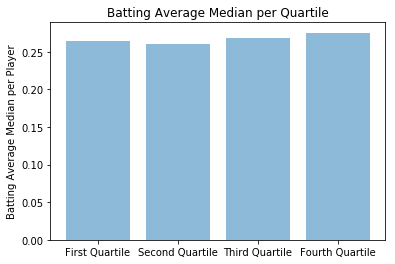

In [20]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.BA.median (),baseball_2nd.BA.median(),baseball_3rd.BA.median(),baseball_4th.BA.median()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Batting Average Median per Player')
plt.title('Batting Average Median per Quartile')

plt.show()



In [21]:
d= {'Median Batting Average per Player' : [baseball_1st.BA.median(),baseball_2nd.BA.median(),baseball_3rd.BA.median(),baseball_4th.BA.median()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Median Batting Average per Player'])
df2  

,Quartile,Median Batting Average per Player
0,1,0.264039
1,2,0.260613
2,3,0.268216
3,4,0.275379


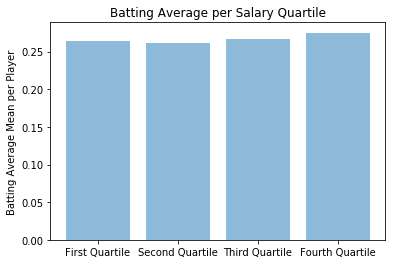

In [22]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.BA.mean(),baseball_2nd.BA.mean(),baseball_3rd.BA.mean(),baseball_4th.BA.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Batting Average Mean per Player')
plt.title('Batting Average per Salary Quartile')

plt.show()

In [23]:
d= {'Mean Batting Average per Player' : [baseball_1st.BA.mean(),baseball_2nd.BA.mean(),baseball_3rd.BA.mean(),baseball_4th.BA.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Mean Batting Average per Player'])
df2                 

,Quartile,Mean Batting Average per Player
0,1,0.264046
1,2,0.261988
2,3,0.267234
3,4,0.275119


In [24]:
model = ols('BA ~ quartile', data = baseball).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df          F        PR(>F)
quartile  0.041001     1.0  48.347717  4.681239e-12
Residual  1.875858  2212.0        NaN           NaN


In [25]:
model = ols('BA ~ quartile', data = baseball123).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df         F    PR(>F)
quartile  0.002788     1.0  3.467913  0.062747
Residual  1.332912  1658.0       NaN       NaN


In [26]:
model = ols('BA ~ quartile', data = baseball12).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df         F   PR(>F)
quartile  0.001175     1.0  1.500404  0.22087
Residual  0.867999  1108.0       NaN      NaN


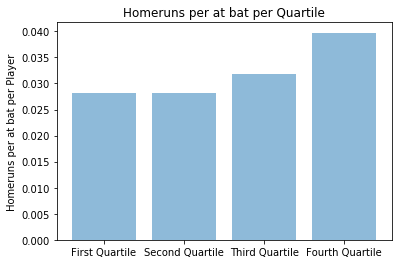

In [27]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.HRAB.mean(),baseball_2nd.HRAB.mean(),baseball_3rd.HRAB.mean(),baseball_4th.HRAB.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Homeruns per at bat per Player')
plt.title('Homeruns per at bat per Quartile')

plt.show()



In [28]:
d= {'Homeruns per At Bat per Player' : [baseball_1st.HRAB.mean(),baseball_2nd.HRAB.mean(),baseball_3rd.HRAB.mean(),baseball_4th.HRAB.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Homeruns per At Bat per Player'])
df2    

,Quartile,Homeruns per At Bat per Player
0,1,0.028238
1,2,0.028194
2,3,0.031889
3,4,0.039733


In [29]:
model = ols('HR ~ quartile', data = baseball).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

                 sum_sq      df           F        PR(>F)
quartile   19596.370802     1.0  218.705479  2.903024e-47
Residual  198198.840129  2212.0         NaN           NaN


In [30]:
model = ols('HR ~ quartile', data = baseball123).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

                 sum_sq      df          F        PR(>F)
quartile    2542.981653     1.0  30.248173  4.395666e-08
Residual  139389.032805  1658.0        NaN           NaN


In [31]:
model = ols('HR ~ quartile', data = baseball12).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

                sum_sq      df         F    PR(>F)
quartile     10.585421     1.0  0.127699  0.720898
Residual  91845.810976  1108.0       NaN       NaN


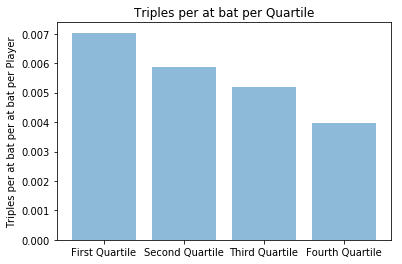

In [32]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.TRAB.mean(),baseball_2nd.TRAB.mean(),baseball_3rd.TRAB.mean(),baseball_4th.TRAB.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Triples per at bat per at bat per Player')
plt.title('Triples per at bat per Quartile')

plt.show()




In [33]:
d= {'Triples per At Bat per Player' : [baseball_1st.TRAB.mean(),baseball_2nd.TRAB.mean(),baseball_3rd.TRAB.mean(),baseball_4th.TRAB.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Triples per At Bat per Player'])
df2 

,Quartile,Triples per At Bat per Player
0,1,0.007036
1,2,0.005870
2,3,0.005182
3,4,0.003955


In [34]:
model = ols('TRAB ~ quartile', data = baseball).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df          F        PR(>F)
quartile  0.002736     1.0  102.31627  1.525546e-23
Residual  0.059159  2212.0        NaN           NaN


In [35]:
model = ols('TRAB ~ quartile', data = baseball123).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df          F        PR(>F)
quartile  0.000952     1.0  31.944858  1.863830e-08
Residual  0.049403  1658.0        NaN           NaN


In [36]:
model = ols('TRAB ~ quartile', data = baseball12).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df          F   PR(>F)
quartile  0.000377     1.0  11.694848  0.00065
Residual  0.035751  1108.0        NaN      NaN


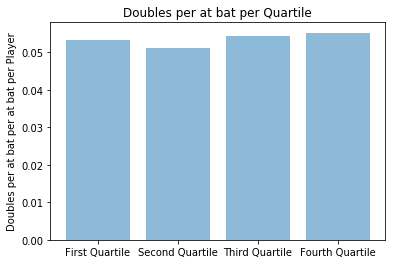

In [37]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.DOAB.mean(),baseball_2nd.DOAB.mean(),baseball_3rd.DOAB.mean(),baseball_4th.DOAB.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Doubles per at bat per at bat per Player')
plt.title('Doubles per at bat per Quartile')

plt.show()




In [38]:
d= {'Doubles per At Bat per Player' : [baseball_1st.DOAB.mean(),baseball_2nd.DOAB.mean(),baseball_3rd.DOAB.mean(),baseball_4th.DOAB.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Doubles per At Bat per Player'])
df2 

,Quartile,Doubles per At Bat per Player
0,1,0.053315
1,2,0.051197
2,3,0.054296
3,4,0.055188


In [39]:
model = ols('DOAB ~ quartile', data = baseball).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df          F    PR(>F)
quartile  0.002100     1.0  11.951267  0.000556
Residual  0.388655  2212.0        NaN       NaN


In [40]:
model = ols('DOAB ~ quartile', data = baseball123).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df         F    PR(>F)
quartile  0.000261     1.0  1.467323  0.225941
Residual  0.294386  1658.0       NaN       NaN


In [41]:
model = ols('DOAB ~ quartile', data = baseball12).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df         F    PR(>F)
quartile  0.001245     1.0  6.620733  0.010209
Residual  0.208334  1108.0       NaN       NaN


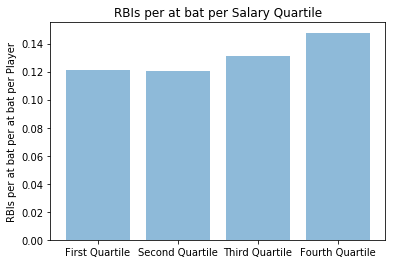

In [42]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.RBIAB.mean(),baseball_2nd.RBIAB.mean(),baseball_3rd.RBIAB.mean(),baseball_4th.RBIAB.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('RBIs per at bat per at bat per Player')
plt.title('RBIs per at bat per Salary Quartile')

plt.show()




In [43]:
d= {'RBIs per At Bat per Player' : [baseball_1st.RBIAB.mean(),baseball_2nd.RBIAB.mean(),baseball_3rd.RBIAB.mean(),baseball_4th.RBIAB.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'RBIs per At Bat per Player'])
df2 

,Quartile,RBIs per At Bat per Player
0,1,0.121059
1,2,0.120435
2,3,0.131196
3,4,0.147746


In [44]:
model = ols('RBIAB ~ quartile', data = baseball).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df          F        PR(>F)
quartile  0.228661     1.0  173.62373  3.166825e-38
Residual  2.913184  2212.0        NaN           NaN


In [45]:
model = ols('RBIAB ~ quartile', data = baseball123).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df          F    PR(>F)
quartile  0.028296     1.0  22.423818  0.000002
Residual  2.092198  1658.0        NaN       NaN


In [46]:
model = ols('RBIAB ~ quartile', data = baseball12).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df         F    PR(>F)
quartile  0.000108     1.0  0.082976  0.773358
Residual  1.442891  1108.0       NaN       NaN


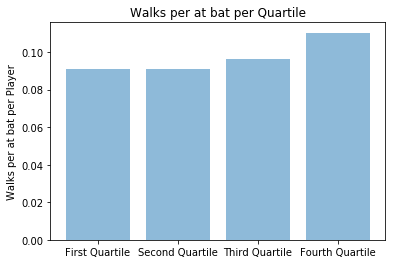

In [47]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.BBAB.mean(),baseball_2nd.BBAB.mean(),baseball_3rd.BBAB.mean(),baseball_4th.BBAB.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Walks per at bat per Player')
plt.title('Walks per at bat per Quartile')

plt.show()




In [48]:
d= {'Walks per At Bat per Player' : [baseball_1st.BBAB.mean(),baseball_2nd.BBAB.mean(),baseball_3rd.BBAB.mean(),baseball_4th.BBAB.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Walks per At Bat per Player'])
df2 

,Quartile,Walks per At Bat per Player
0,1,0.090942
1,2,0.090826
2,3,0.096499
3,4,0.110254


In [49]:
model = ols('BBAB ~ quartile', data = baseball).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df          F        PR(>F)
quartile  0.112193     1.0  75.895156  5.748669e-18
Residual  3.269919  2212.0        NaN           NaN


In [50]:
model = ols('BBAB ~ quartile', data = baseball123).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov)

            sum_sq      df         F    PR(>F)
quartile  0.008508     1.0  6.619098  0.010175
Residual  2.131094  1658.0       NaN       NaN


In [51]:
model = ols('BBAB ~ quartile', data = baseball12).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df         F   PR(>F)
quartile  0.000004     1.0  0.002999  0.95634
Residual  1.369623  1108.0       NaN      NaN


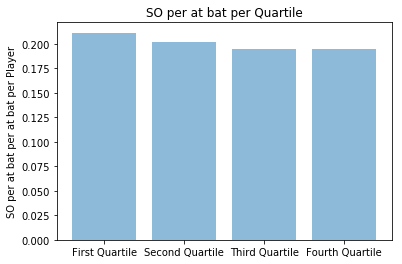

In [52]:
objects = ('First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile')
y_pos = np.arange(len(objects))
performance = [baseball_1st.SOAB.mean(),baseball_2nd.SOAB.mean(),baseball_3rd.SOAB.mean(),baseball_4th.SOAB.mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('SO per at bat per at bat per Player')
plt.title('SO per at bat per Quartile')

plt.show()




In [53]:
d= {'Strikeout per At Bat per Player' : [baseball_1st.SOAB.mean(),baseball_2nd.SOAB.mean(),baseball_3rd.SOAB.mean(),baseball_4th.SOAB.mean()], 'Quartile':[1,2,3,4]}
df2 =pd.DataFrame(d, columns=['Quartile', 'Strikeout per At Bat per Player'])
df2 

,Quartile,Strikeout per At Bat per Player
0,1,0.211478
1,2,0.202116
2,3,0.195054
3,4,0.195218


In [54]:
model = ols('SOAB ~ quartile', data = baseball).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df          F    PR(>F)
quartile  0.086487     1.0  20.366353  0.000007
Residual  9.393386  2212.0        NaN       NaN


In [55]:
model = ols('SOAB ~ quartile', data = baseball123).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df          F    PR(>F)
quartile  0.074618     1.0  17.652663  0.000028
Residual  7.008350  1658.0        NaN       NaN


In [56]:
model = ols('SOAB ~ quartile', data = baseball12).fit()
aov = sm.stats.anova_lm(model, typ=2)
print(aov) 

            sum_sq      df         F   PR(>F)
quartile  0.024322     1.0  5.907968  0.01523
Residual  4.561420  1108.0       NaN      NaN


In [61]:
from sklearn import linear_model


In [64]:
baseballPred = baseball[['SOAB', 'BBAB', 'BA', 'HRAB', 'TRAB', 'DOAB', 'RBIAB', 'salary']]

In [65]:
model = smf.ols('salary ~ SOAB + BBAB + BA + HRAB + TRAB + DOAB + RBIAB', data = baseballPred)
results = model.fit()
print(results.summary())
#yhat = model.predict(baseballPred)
#print(yhat)

model = smf.ols('salary ~ BA + HRAB', data = baseballPred)
results = model.fit()
print(results.summary())

model = sm.formula.glm("salary ~ SOAB + BBAB + BA + HRAB + TRAB + DOAB + RBIAB", data=baseballPred).fit()
print(model.summary())

model = sm.formula.glm("salary ~ BA + HRAB + BBAB", data=baseballPred).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     61.89
Date:                Thu, 30 May 2019   Prob (F-statistic):           1.74e-81
Time:                        17:55:30   Log-Likelihood:                -37386.
No. Observations:                2214   AIC:                         7.479e+04
Df Residuals:                    2206   BIC:                         7.483e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.379e+04   1.41e+06     -0.059      0.9